# Hot Sauce NLP


### web scraping

In [1]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
                    
%matplotlib inline
import matplotlib
import random
import plotly.express as px

In [2]:
def fetch_page(page):
    print(f"scraping page {page + 1}")
    response = requests.get(
        f'https://hotsaucefever.com/hotsauce/page/{page + 1}',
        headers={"Accept-Language":"en-US"}
    )
    soup = BeautifulSoup(response.content, "html.parser")
    return soup

In [3]:

def add_sauces_to_dict(soup, dict):
    for sauce_html in soup.find_all(class_='detail'):
        dict['Hot Sauce'].append(sauce_html.find('h2').find('a').string)
        dict['Rating'].append(sauce_html.find('h3').find('span').string)
        dict['Makers'].append(
            sauce_html.find(class_="list-txt").get_text())

In [4]:
def create_sauces_df(max_page):
    sauces_dict = {'Hot Sauce': [], 'Rating': [], 'Makers': []}
    for page in range(max_page):
        soup = fetch_page(page)
        add_sauces_to_dict(soup, sauces_dict)
    return pd.DataFrame.from_dict(sauces_dict)

In [5]:
sauces_df = create_sauces_df(2)
sauces_df.shape

scraping page 1
scraping page 2


(50, 3)

### Sorting the DF

In [6]:
# new data frame with split value columns
new = sauces_df["Makers"].str.split("Maker:", n =1, expand = True)


In [7]:
new1 = new[1].str.split(":", expand = True)


#### stripping unwanted html

In [8]:
cols = [0, 1, 2]
new1[cols] = new1[cols].apply(lambda x: x.str.strip('%\n'))
new1[cols] = new1[cols].apply(lambda x: x.str.strip(' \n%'))
new1[cols] = new1[cols].apply(lambda x: x.str.strip('%\n'))
new1[cols] = new1[cols].apply(lambda x: x.str.strip('%\nPepper(s)'))
new1[cols] = new1[cols].apply(lambda x: x.str.strip('\n'))
new1[cols] = new1[cols].apply(lambda x: x.str.strip('SHU'))

#### Merging 2 DF's

In [9]:
result = pd.concat([sauces_df, new1], axis=1, ignore_index=True)
result.drop(result.columns[[2]], axis=1, inplace=True)
new2 = result[0].str.split(" - ", expand = True)

In [10]:
result

,0,1,3,4,5
0,Whitehouse Station Sauce Company - Jalapeño,N/A,"Whitehouse Station Sauce Company, Whitehouse S...",Jalapeño,None
1,Jersey Barnfire - Black Garlic,None,"Jersey Barnfire, Sparta, NJ, United States\n ...","abanero, Jalapeño",None
2,Roofeeo Landis - Jah Mama Sauce,N/A,"Roofeeo Landis, Los Angeles , CA, United State...","cotch Bonnet, Fresno",None
3,Ric Orlando's Best - Purple Haze Double Dose,N/A,"Ric Orlando's Best, West Hurley, NY, United St...","abanero, Carolina Rea",None
4,Hell's Kitchen Hot Sauce - Pepper Pastry,N/A,"ell's Kitchen Hot Sauce, New York, NY, United ...","abanero, Fatalii",None
5,Pickle Monster Hot Sauce - Spicy Boi Blend,None,"ickle Monster Hot Sauce, Philadelphia, PA, Uni...","abanero, Jalapeño, Serrano",None
6,Pickle Monster Hot Sauce - Pickle Monster,None,"ickle Monster Hot Sauce, Philadelphia, PA, Uni...","Jalapeño, Serrano",None
7,Swamp Dragon - Tequila Hot Sauce,None,"wamp Dragon, Baton Rouge, LA, United Stat",None,None
8,Cepera - Molho de Pimenta Vermelha: Salsa de A...,None,"Cepera, Brazil\n",Jalapeño,None
9,Tacoma Sauce Co. - Nero,N/A,"Tacoma Sauce Co., Tacoma, United States\n ...",abanero\n \n,"3,000"


In [15]:
result1 = pd.concat([result, new2], axis=1, ignore_index=True)
result1.drop(result1.columns[[0]], axis=1, inplace=True)
#result1.drop(result1.columns[[6]], axis=1, inplace=True)
result1.columns = ['Rating', 'Address', 'Peppers', 'Scoville', 'Company', 'Sauce']
result1 = result1[['Sauce', 'Company', 'Rating','Peppers', 'Scoville', 'Address']]

In [16]:
result1

,Sauce,Company,Rating,Peppers,Scoville,Address
0,Jalapeño,Whitehouse Station Sauce Company,N/A,Jalapeño,None,"Whitehouse Station Sauce Company, Whitehouse S..."
1,Black Garlic,Jersey Barnfire,None,"abanero, Jalapeño",None,"Jersey Barnfire, Sparta, NJ, United States\n ..."
2,Jah Mama Sauce,Roofeeo Landis,N/A,"cotch Bonnet, Fresno",None,"Roofeeo Landis, Los Angeles , CA, United State..."
3,Purple Haze Double Dose,Ric Orlando's Best,N/A,"abanero, Carolina Rea",None,"Ric Orlando's Best, West Hurley, NY, United St..."
4,Pepper Pastry,Hell's Kitchen Hot Sauce,N/A,"abanero, Fatalii",None,"ell's Kitchen Hot Sauce, New York, NY, United ..."
5,Spicy Boi Blend,Pickle Monster Hot Sauce,None,"abanero, Jalapeño, Serrano",None,"ickle Monster Hot Sauce, Philadelphia, PA, Uni..."
6,Pickle Monster,Pickle Monster Hot Sauce,None,"Jalapeño, Serrano",None,"ickle Monster Hot Sauce, Philadelphia, PA, Uni..."
7,Tequila Hot Sauce,Swamp Dragon,None,None,None,"wamp Dragon, Baton Rouge, LA, United Stat"
8,Molho de Pimenta Vermelha: Salsa de Aji Roja,Cepera,None,Jalapeño,None,"Cepera, Brazil\n"
9,Nero,Tacoma Sauce Co.,N/A,abanero\n \n,"3,000","Tacoma Sauce Co., Tacoma, United States\n ..."


In [ ]:
#result1.drop(result1.columns[[4]], axis=1, inplace=True)

In [17]:
result1['Rating'] = result1['Rating'].replace(np.nan, 0)

In [18]:
result1 = result1.drop_duplicates()

#### Randomise Rating Due to lack of info

In [20]:
np.random.seed(42)
result1['Rating'] = np.round(np.random.uniform(3.2, 5.0, size=(len(result1), 1)), 1)

In [25]:
result1['Scoville'] = np.round(np.random.uniform(1000, 1160000, size=(len(result1), 1)), 1)

In [64]:
result1['Price'] = np.round(np.random.uniform(4.99, 30.00, size=(len(result1), 1)), 2)

In [66]:
#result1['Price'].value_counts()

### Data Visualisation

In [67]:
pepper_count = result1.groupby('Peppers').mean()

In [68]:
pepper_count = pepper_count.reset_index(level=0)

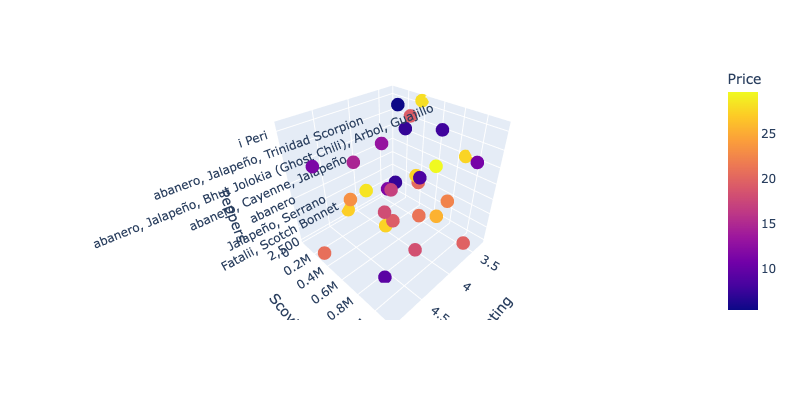

In [71]:
fig = px.scatter_3d(pepper_count,  x="Rating", y="Scoville",z='Peppers' )
fig.update_layout(autosize=False, width=800, height=400
                  , showlegend=True)
fig.show()
